# Disease Classification from Gene Expression — Linear Baseline

**Biological framing:** We want to classify cancer vs normal samples based on measured features.

This demo shows a complete pipeline:

1. Biological data → tensor (`X`, `y`)
2. Linear model (`LogisticRegression`)
3. Evaluation (accuracy, confusion matrix)
4. Insight from feature coefficients

Runtime is kept very short using the built-in breast cancer dataset from `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [2]:
# 1. Load biological data → tensor

breast = load_breast_cancer()
X = breast.data  # features already numeric
y = breast.target  # 0 = malignant, 1 = benign
feature_names = breast.feature_names

print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"Classes: {dict(enumerate(breast.target_names))}")

X shape: (569, 30), y shape: (569,)
Classes: {0: np.str_('malignant'), 1: np.str_('benign')}


In [3]:
# 2. Train/test split and standardization

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (455, 30)
Test shape: (114, 30)


In [4]:
# 3. Fit linear model (Logistic Regression)

clf = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.3f}")

Test accuracy: 0.982


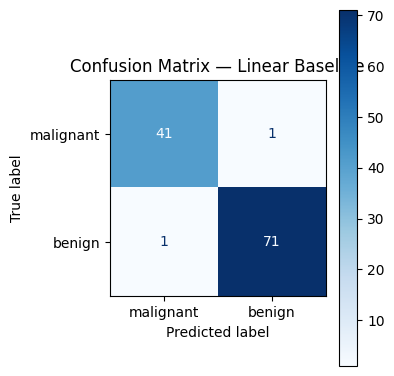

In [5]:
# 4. Evaluation: confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(4, 4))
ConfusionMatrixDisplay(cm, display_labels=["malignant", "benign"]).plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix — Linear Baseline")
plt.tight_layout()
plt.show()

In [6]:
# 5. Model insight: feature coefficients

coefs = clf.coef_[0]
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs
})

# Sort by absolute value to highlight strongest effects
coef_df["abs_coef"] = coef_df["coef"].abs()
coef_df_sorted = coef_df.sort_values("abs_coef", ascending=False).head(10)

print("Top 10 features by absolute coefficient (linear baseline):")
coef_df_sorted[["feature", "coef"]]

Top 10 features by absolute coefficient (linear baseline):


,feature,coef
21,worst texture,-1.255088
10,radius error,-1.082965
27,worst concave points,-0.953686
23,worst area,-0.947756
20,worst radius,-0.947616
28,worst symmetry,-0.939181
13,area error,-0.929104
26,worst concavity,-0.823151
22,worst perimeter,-0.763220
24,worst smoothness,-0.746625


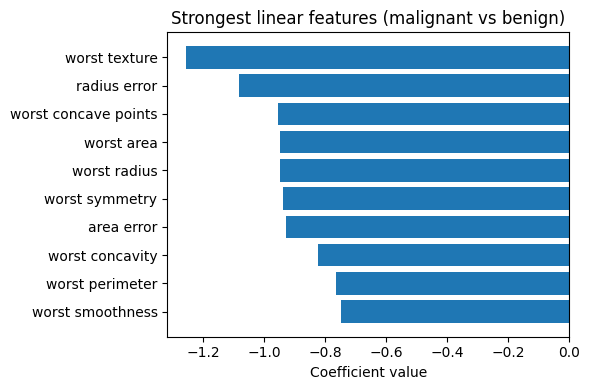

In [7]:
# 6. Visualize strongest coefficients

plt.figure(figsize=(6, 4))
colors = ["tab:red" if c > 0 else "tab:blue" for c in coef_df_sorted["coef"]]
plt.barh(coef_df_sorted["feature"], coef_df_sorted["coef"], color=colors)
plt.xlabel("Coefficient value")
plt.title("Strongest linear features (malignant vs benign)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()